In [62]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


In [63]:
df = pd.read_csv('customers.csv')
X = df.iloc[:,[3,4]].values


In [64]:

df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [65]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

array([[ 79.70833333,  14.29166667],
       [ 62.23404255,  47.55319149],
       [ 80.375     ,  82.9375    ],
       [ 28.18181818,  33.27272727],
       [ 24.95      ,  81.        ],
       [114.71428571,  78.42857143],
       [109.7       ,  22.        ],
       [ 24.58333333,   9.58333333],
       [ 45.89189189,  52.37837838]])

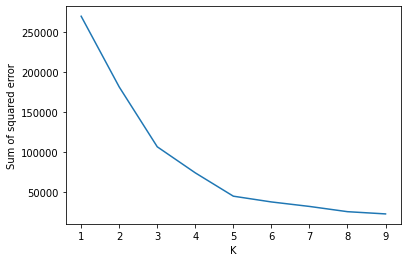

In [66]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

km.cluster_centers_

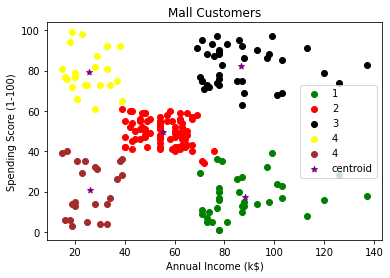

In [75]:
km = KMeans(n_clusters=5, init='k-means++',random_state=0)
y_pred = km.fit_predict(X)

df['cluster'] = y_pred

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5= df[df.cluster==4]

plt.title('Mall Customers')

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green',label='1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red',label='2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black',label='3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='yellow',label='4')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='brown',label='4')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [68]:
len(km.cluster_centers_)


4